<a href="https://colab.research.google.com/github/jaden-rufino-aguiar/PlacementPrediction/blob/main/Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/Placement_Data_Full_Class.csv')

# Display the first few rows
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# Drop 'salary' column since it has missing values and isn't needed for prediction
df = df.drop('salary', axis=1)

In [ ]:
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataframe
df_encoded.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,True,True,True,True,False,False,True,False,True,True
1,2,79.33,78.33,77.48,86.5,66.28,True,False,True,False,True,False,True,True,False,True
2,3,65.00,68.00,64.00,75.0,57.80,True,False,False,False,False,False,False,False,False,True
3,4,56.00,52.00,52.00,66.0,59.43,True,False,False,False,True,False,True,False,True,False
4,5,85.80,73.60,73.30,96.8,55.50,True,False,False,True,False,False,False,False,False,True


In [ ]:
# Split data into features (X) and target (y)
X = df_encoded.drop('status_Placed', axis=1)
y = df_encoded['status_Placed']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(172, 15) (43, 15) (172,) (43,)


In [ ]:
# Train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)


# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.62      0.42      0.50        12
        True       0.80      0.90      0.85        31

    accuracy                           0.77        43
   macro avg       0.71      0.66      0.67        43
weighted avg       0.75      0.77      0.75        43



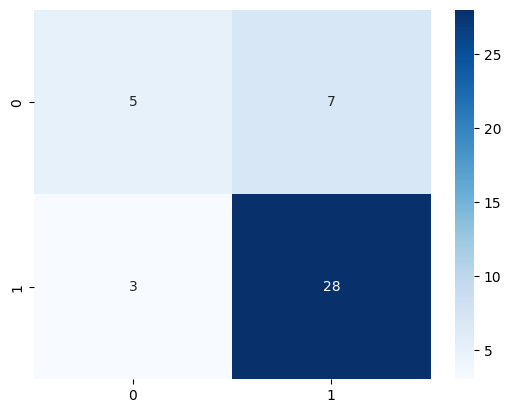

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(rf_classifier, 'placement_predictor_model.pkl')

['placement_predictor_model.pkl']